### Project 2

In [1]:
import itertools
import numpy as np
import pandas as pd 
from numbers import Number
import sqlite3
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

import pickle
import os

In [2]:
#Data Files
# zippedData/
#     bom.movie_gross.csv -> don't need, all info in Budgets and rt_movie_info
#     im.db -> SQL
#     rt.movie_info.tsv
#     rt.reviews.tsv
#     tmdb.movies.csv
#     tn.movie_budgets.csv


### Importing Datasets

#### IMDB

In [3]:
#Create path to imdb
im_db = 'zippedData/im.db'
im_db_conn = sqlite3.connect(im_db)

pd.read_sql("""

SELECT *
FROM sqlite_master

""",im_db_conn)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


#### Gross

In [4]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv("zippedData/bom.movie_gross.csv")

# Define the file and table names
database_file = "gross_database.db"
table_name = "movie_gross_table"

# Check if the database file already exists
if not os.path.exists(database_file):
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv("zippedData/bom.movie_gross.csv")

    # Create a connection to a SQLite database
    gross_conn = sqlite3.connect(database_file)

    # Save the DataFrame into a table in the SQLite database
    df.to_sql(table_name, gross_conn, index=False)

    # Close the database connection
    gross_conn.close()

else:
    # If the database file already exists, print a message
    print(f"The database file '{database_file}' already exists. Skipping database creation.")
    
# Create a connection to a SQLite database
gross_conn = sqlite3.connect(database_file)

#Look at the data
pd.read_sql("""

SELECT *
FROM movie_gross_table

""",gross_conn)

The database file 'gross_database.db' already exists. Skipping database creation.


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,None,2018
3383,Edward II (2018 re-release),FM,4800.0,None,2018
3384,El Pacto,Sony,2500.0,None,2018
3385,The Swan,Synergetic,2400.0,None,2018


#### Movie Info

In [5]:
# Define the file and table names
database_file = "movie_info_database.db"
table_name = "movie_info_table"

# Check if the database file already exists
if not os.path.exists(database_file):
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv("zippedData/rt.movie_info.tsv", delimiter = "\t")

    # Save the DataFrame into a table in the SQLite database
    df.to_sql(table_name, movie_info_conn, index=False)

    # Close the database connection
    movie_info_conn.close()

else:
    # If the database file already exists, print a message
    print(f"The database file '{database_file}' already exists. Skipping database creation.")
    
# Create a connection to a SQLite database
movie_info_conn = sqlite3.connect(database_file)

rt_movie_info_df = pd.read_csv("zippedData/rt.movie_info.tsv", delimiter = "\t")


#Look at the data
pd.read_sql("""

SELECT *
FROM movie_info_table

""",movie_info_conn)

The database file 'movie_info_database.db' already exists. Skipping database creation.


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",None,None,104 minutes,None
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",None,None,116 minutes,None
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",None,None,128 minutes,None
4,7,None,NR,Drama|Romance,Rodney Bennett,Giles Cooper,None,None,None,None,200 minutes,None
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,None,None,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",None,None,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,None,"Jan 1, 1962","May 11, 2004",None,None,111 minutes,None
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",None,None,101 minutes,None


#### Reviews

In [6]:
# Define the file and table names
database_file = "reviews_database.db"
table_name = "reviews_table"

# Check if the database file already exists
if not os.path.exists(database_file):
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv("zippedData/rt.reviews.tsv", delimiter = "\t",encoding='latin1')

    # Create a connection to a SQLite database
    reviews_conn = sqlite3.connect(database_file)

    # Save the DataFrame into a table in the SQLite database
    df.to_sql(table_name, reviews_conn, index=False)

    # Close the database connection
    reviews_conn.close()

else:
    # If the database file already exists, print a message
    print(f"The database file '{database_file}' already exists. Skipping database creation.")
    

# Read the CSV file into a pandas DataFrame
rt_reviews_df = pd.read_csv("zippedData/rt.reviews.tsv", delimiter = "\t",encoding='latin1')
    
# Create a connection to a SQLite database
reviews_conn = sqlite3.connect(database_file)

#Look at the data
pd.read_sql("""

SELECT *
FROM reviews_table

""",reviews_conn)

The database file 'reviews_database.db' already exists. Skipping database creation.


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,None,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,None,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,None,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,None,fresh,None,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,None,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,None,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,None,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,None,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


#### Movies

In [7]:
# Define the file and table names
database_file = "movies_database.db"
table_name = "movies_table"

movies_df = pd.read_csv("zippedData/tmdb.movies.csv")

# Check if the database file already exists
if not os.path.exists(database_file):
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv("zippedData/tmdb.movies.csv")

    # Create a connection to a SQLite database
    movies_conn = sqlite3.connect(database_file)

    # Save the DataFrame into a table in the SQLite database
    df.to_sql(table_name, movies_conn, index=False)

    # Close the database connection
    movies_conn.close()

else:
    # If the database file already exists, print a message
    print(f"The database file '{database_file}' already exists. Skipping database creation.")
    
# Create a connection to a SQLite database
movies_conn = sqlite3.connect(database_file)


#Look at the data
pd.read_sql("""

SELECT *
FROM movies_table

""",movies_conn)

The database file 'movies_database.db' already exists. Skipping database creation.


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


#### Movie Budgets

In [8]:
# Define the file and table names
database_file = "budgets_database.db"
table_name = "budgets"



# Check if the database file already exists
if not os.path.exists(database_file):
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv("zippedData/tn.movie_budgets.csv")

    # Create a connection to a SQLite database
    budgets_conn = sqlite3.connect(database_file)

    # Save the DataFrame into a table in the SQLite database
    df.to_sql(table_name, budgets_conn, index=False)

    # Close the database connection
    budgets_conn.close()

else:
    # If the database file already exists, print a message
    print(f"The database file '{database_file}' already exists. Skipping database creation.")

# Create a connection to a SQLite database
budgets_conn = sqlite3.connect(database_file)

budgets_df = pd.read_csv("zippedData/tn.movie_budgets.csv")
    
#Look at the data
pd.read_sql("""

SELECT *
FROM budgets

""",budgets_conn)

The database file 'budgets_database.db' already exists. Skipping database creation.


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


### Data Analysis and Cleaning

In [9]:
budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [10]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [11]:
movies_df.rename(columns = {'original_title':'movie'},inplace = True)
movies_df.head()

,Unnamed: 0,genre_ids,id,original_language,movie,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [12]:
budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [13]:
movies_df['movie'] = movies_df['movie'].astype(str)
budgets_df['movie'] = budgets_df['movie'].astype(str)

In [14]:
movies_and_budgets_df = movies_df.merge(budgets_df, how='inner', on = 'movie')
movies_and_budgets_df.head()

,Unnamed: 0,genre_ids,id_x,original_language,movie,popularity,release_date_x,title,vote_average,vote_count,id_y,release_date_y,production_budget,domestic_gross,worldwide_gross
0,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,30,"Mar 26, 2010","$165,000,000","$217,581,232","$494,870,992"
1,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,15,"May 7, 2010","$170,000,000","$312,433,331","$621,156,389"
2,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,37,"Nov 22, 1995","$30,000,000","$191,796,233","$364,545,516"
3,2473,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,37,"Nov 22, 1995","$30,000,000","$191,796,233","$364,545,516"
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,38,"Jul 16, 2010","$160,000,000","$292,576,195","$835,524,642"


In [15]:
rotten_tomatoes_df = rt_reviews_df.merge(rt_movie_info_df, how='inner', on = 'id')
rotten_tomatoes_df.head()

,id,review,rating_x,fresh,critic,top_critic,publisher,date,synopsis,rating_y,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One


In [16]:
movies_and_budgets_df.shape

(2316, 15)

In [17]:
rotten_tomatoes_df.shape

(54432, 19)

In [18]:
movies_and_budgets_df.info()
#genre_ids -> rec
#popularity -> ev
#release_date -> rec
#production_budget -> rec
#domestic_gross -> ev
#worldwide_gross -> ev

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2316 entries, 0 to 2315
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2316 non-null   int64  
 1   genre_ids          2316 non-null   object 
 2   id_x               2316 non-null   int64  
 3   original_language  2316 non-null   object 
 4   movie              2316 non-null   object 
 5   popularity         2316 non-null   float64
 6   release_date_x     2316 non-null   object 
 7   title              2316 non-null   object 
 8   vote_average       2316 non-null   float64
 9   vote_count         2316 non-null   int64  
 10  id_y               2316 non-null   int64  
 11  release_date_y     2316 non-null   object 
 12  production_budget  2316 non-null   object 
 13  domestic_gross     2316 non-null   object 
 14  worldwide_gross    2316 non-null   object 
dtypes: float64(2), int64(4), object(9)
memory usage: 289.5+ KB


In [19]:
rotten_tomatoes_df.info()
#rating_x -> ev
#genre -> rec
#runtime -> rec
#theatre_date -> rec
#studio -> rec

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54432 entries, 0 to 54431
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            54432 non-null  int64 
 1   review        48869 non-null  object
 2   rating_x      40915 non-null  object
 3   fresh         54432 non-null  object
 4   critic        51710 non-null  object
 5   top_critic    54432 non-null  int64 
 6   publisher     54123 non-null  object
 7   date          54432 non-null  object
 8   synopsis      54300 non-null  object
 9   rating_y      54346 non-null  object
 10  genre         54345 non-null  object
 11  director      48992 non-null  object
 12  writer        45206 non-null  object
 13  theater_date  53206 non-null  object
 14  dvd_date      53206 non-null  object
 15  currency      33310 non-null  object
 16  box_office    33310 non-null  object
 17  runtime       53594 non-null  object
 18  studio        40125 non-null  object
dtypes: i

In [20]:
#Drop columns with no box_office data
rotten_tomatoes_df.dropna(subset=['box_office','runtime'],inplace = True)

In [21]:
#Clean up columns
movies_and_budgets_df['production_budget'] = movies_and_budgets_df['production_budget'].str.replace(r'[\$,]',"",regex = True)
movies_and_budgets_df['domestic_gross'] = movies_and_budgets_df['domestic_gross'].str.replace(r'[\$,]',"",regex = True)
movies_and_budgets_df['worldwide_gross'] = movies_and_budgets_df['worldwide_gross'].str.replace(r'[\$,]',"",regex = True)
rotten_tomatoes_df['box_office'] = rotten_tomatoes_df['box_office'].str.replace(r'[,]',"",regex=True)
rotten_tomatoes_df['runtime'] = rotten_tomatoes_df['runtime'].str.replace(r'[\D]',"", regex=True)


#Change columns into ints
movies_and_budgets_df['production_budget'] = movies_and_budgets_df['production_budget'].astype(int)
movies_and_budgets_df['domestic_gross'] = movies_and_budgets_df['domestic_gross'].astype(int)
movies_and_budgets_df['worldwide_gross'] = movies_and_budgets_df['worldwide_gross'].astype(int)
rotten_tomatoes_df['box_office'] = rotten_tomatoes_df['box_office'].astype(int)
rotten_tomatoes_df['runtime'] = rotten_tomatoes_df['runtime'].astype(int)

In [22]:
#Adding columns for clearer picture
movies_and_budgets_df['foreign_gross'] =  movies_and_budgets_df['worldwide_gross'] - movies_and_budgets_df['domestic_gross']
movies_and_budgets_df['profit'] = movies_and_budgets_df['worldwide_gross'] - movies_and_budgets_df['production_budget']
movies_and_budgets_df['release_date_x'] = pd.to_datetime(movies_and_budgets_df['release_date_x'])
movies_and_budgets_df['release_month'] = movies_and_budgets_df['release_date_x'].dt.month
rotten_tomatoes_df['theater_date'] = pd.to_datetime(rotten_tomatoes_df['theater_date'])
rotten_tomatoes_df['theater_month'] = rotten_tomatoes_df['theater_date'].dt.month

### Quick Graph Analysis

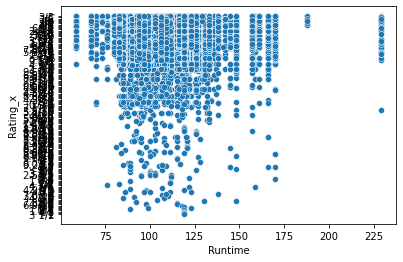

In [23]:
sns.scatterplot(data = rotten_tomatoes_df, x = 'runtime', y ='rating_x')
plt.xlabel('Runtime')
plt.ylabel('Rating_x')
plt.show()
#Based on graph below, rule run time out

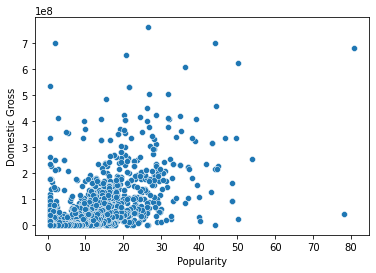

In [24]:
sns.scatterplot(data = movies_and_budgets_df, x = 'popularity', y ='domestic_gross')
plt.xlabel('Popularity')
plt.ylabel('Domestic Gross')
plt.show()

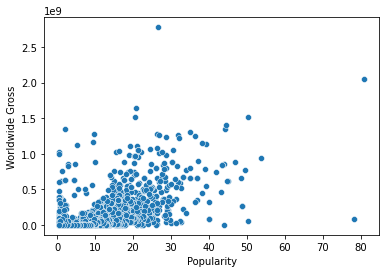

In [25]:
sns.scatterplot(data = movies_and_budgets_df, x = 'popularity', y ='worldwide_gross')
plt.xlabel('Popularity')
plt.ylabel('Worldwide Gross')
plt.show()

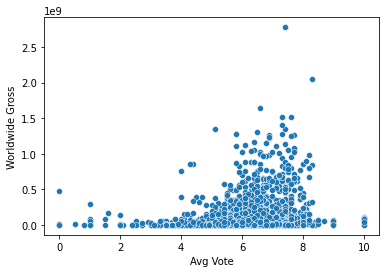

In [26]:
sns.scatterplot(data = movies_and_budgets_df, x = 'vote_average', y ='worldwide_gross')
plt.xlabel('Avg Vote')
plt.ylabel('Worldwide Gross')
plt.show()

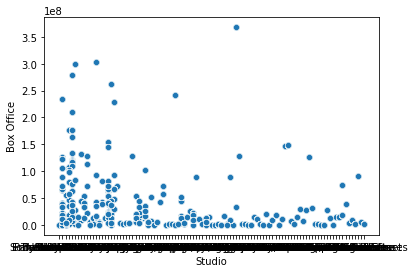

In [27]:
sns.scatterplot(data = rotten_tomatoes_df, x = 'studio', y ='box_office')
plt.xlabel('Studio')
plt.ylabel('Box Office')
plt.show()

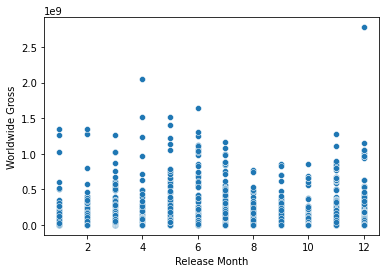

In [28]:
sns.scatterplot(data = movies_and_budgets_df, x = 'release_month', y ='worldwide_gross')
plt.xlabel('Release Month')
plt.ylabel('Worldwide Gross')
plt.show()

In [29]:
#Consolidate reviews into individual films
rotten_tomatoes_consolidated_df = rotten_tomatoes_df.groupby(by = ['id','theater_month']).sum()
rotten_tomatoes_consolidated_df

,,top_critic,box_office,runtime
id,theater_month,,,
3,8.0,34,97800000,17604
10,1.0,28,4431554820,8856
13,4.0,32,21290830,11685
14,6.0,18,5665968,4914
23,12.0,44,23105586897,30057
...,...,...,...,...
1976,2.0,32,171600650,15990
1980,9.0,38,4307108950,20230
1981,10.0,3,5664756,516


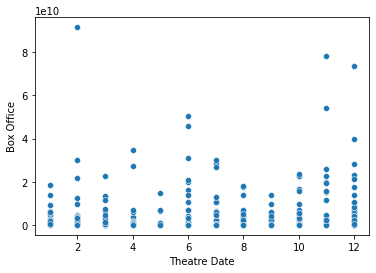

In [30]:
sns.scatterplot(data = rotten_tomatoes_consolidated_df, x = 'theater_month', y ='box_office')
plt.xlabel('Theatre Date')
plt.ylabel('Box Office')
plt.show()

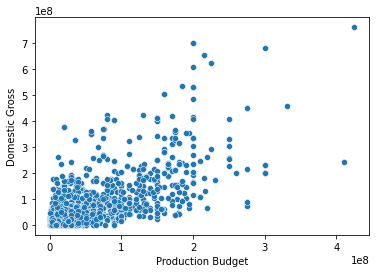

In [31]:
sns.scatterplot(data = movies_and_budgets_df, x = 'production_budget', y ='domestic_gross')
plt.xlabel('Production Budget')
plt.ylabel('Domestic Gross')
plt.show()